In [1]:
from astropy.io import fits

In [4]:
cd /orange/adamginsburg/jwst/brick/mastDownload/JWST/jw02221001001_05101_00018_nrca1/

/orange/adamginsburg/jwst/brick/mastDownload/JWST/jw02221001001_05101_00018_nrca1


In [5]:
ls

jw02221001001_05101_00018_nrca1_cal.fits
jw02221001001_05101_00018_nrca1_i2d.fits
jw02221001001_05101_00018_nrca1_o001_crf.fits
jw02221001001_05101_00018_nrca1_rate.fits
jw02221001001_05101_00018_nrca1_rateints.fits
jw02221001001_05101_00018_nrca1_uncal.fits
jw02221-o001_20220828t044842_image2_666_asn.json


In [33]:
slcs = slice(1558,1608), slice(1625, 1675)

In [34]:
import glob
import pylab as pl
from astropy.visualization import simple_norm

(2048, 2048)
(1, 2, 2048, 2048)
(2048, 2048)
(2048, 2048)
(1, 2048, 2048)
(2058, 2058)


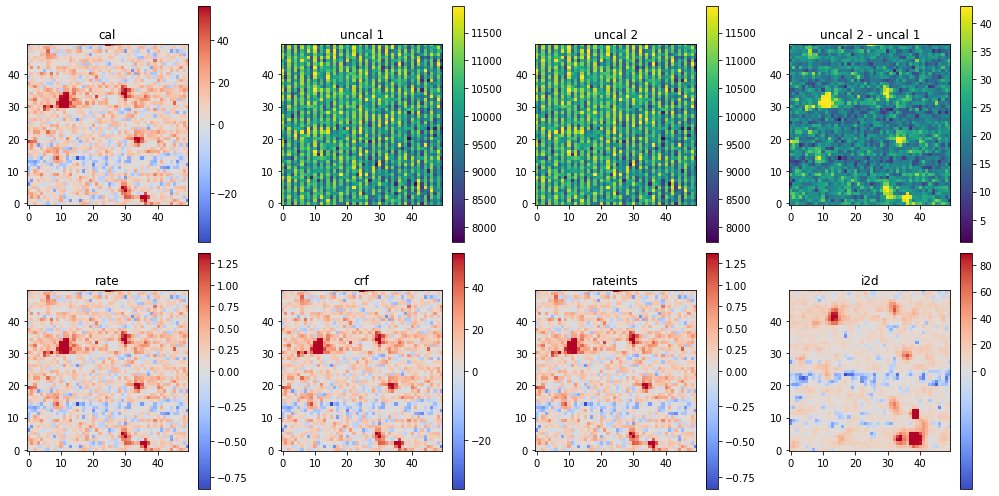

In [43]:
from matplotlib import colors
import numpy as np
ii = 1
pl.figure(figsize=(14,7))
for fn in glob.glob("*.fits"):
    pl.subplot(2,4,ii)
    fh=fits.open(fn)
    name = fn.split("_")[-1].split(".")[0]
    print(fh[1].data.shape)
    if 'uncal' in fn:
        data1 = fh[1].data[0][0][slcs]
        pl.imshow(data1,norm=simple_norm(data1, max_percent=99),  origin='lower')
        pl.title(f"{name} 1")
        pl.colorbar()
        ii += 1
        pl.subplot(2,4,ii)
        data2 = fh[1].data[0][1][slcs]
        pl.imshow(data2, norm=simple_norm(data1, max_percent=99),  origin='lower')
        pl.title(f"{name} 2")
        pl.colorbar()
        ii += 1
        pl.subplot(2,4,ii)
        data = data2 - data1
        #divnorm=colors.TwoSlopeNorm(vmin=data.min(), vcenter=0., vmax=np.nanpercentile(data, 99))
        pl.imshow(data, norm=simple_norm(data, max_percent=99), origin='lower')
        pl.title(f"uncal 2 - uncal 1")
        pl.colorbar()
    else:
        data = fh[1].data.squeeze()[slcs]
        divnorm=colors.TwoSlopeNorm(vmin=data.min(), vcenter=0., vmax=np.nanpercentile(data, 99))
        pl.imshow(data, norm=divnorm, cmap='coolwarm', origin='lower')
        pl.colorbar()
        pl.title(name)
    ii = ii+1
pl.tight_layout()

/scratch/local/45915091/ipykernel_11063/4256662406.py:9: RuntimeWarning: divide by zero encountered in log2
  pl.imshow(np.log2(im[cutout]), origin='lower')


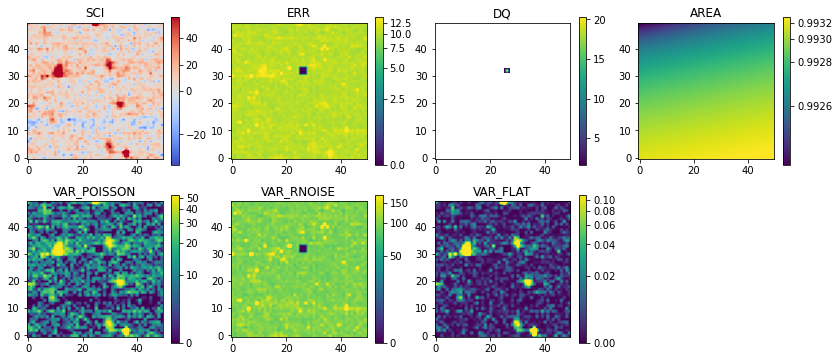

In [51]:
fh = fits.open("jw02221001001_05101_00018_nrca1_cal.fits")
#cutout = slice(2076,2114), slice(4201,4242)
cutout = slcs
pl.figure(figsize=(14,6))
for ii, ext in enumerate(fh[1:8]):
    pl.subplot(2,4,ii+1)
    im = ext.data
    if ext.header['EXTNAME'] == 'DQ':
        pl.imshow(np.log2(im[cutout]), origin='lower')
    elif ext.header['EXTNAME'] == 'SCI':
        divnorm=colors.TwoSlopeNorm(vmin=im[cutout].min(), vcenter=0., vmax=np.nanpercentile(im[cutout], 99))
        pl.imshow(im[cutout],
                  norm=divnorm,
                  cmap='coolwarm',
                  origin='lower')
    else:
        pl.imshow(im[cutout],
                  norm=simple_norm(im[cutout], stretch='asinh', max_percent=99),
                  origin='lower')
    pl.colorbar()
    pl.title(ext.header['EXTNAME'])